# A fórmula mágica para investir em ações

<a href ="https://en.wikipedia.org/wiki/Magic_formula_investing" >Fórmula magica</a> é uma metodologia de investimento em ações apoiada em análise fundamentalista com visão de médio e longo prazo desenvolvida por <a href="https://en.wikipedia.org/wiki/Joel_Greenblatt" >Joel Greenblatt.</a>O método tem como principal objetivo selecionar e classificar ações que estão subprecificadas e, seguidamente, montar uma carteira com elas. 
O presente trabalho visa, para fins científicos, aplicar o método de Greenblatt ao mercado de ações brasileiro.

In [1]:
''' Importando bibliotecas '''

from pandas_datareader import data as pdr
from fpdf import FPDF
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import string as stg
import warnings as w
import requests
import seaborn
from twilio.rest import Client

w.filterwarnings('ignore')
yf.pdr_override()

In [2]:
# Extraindo dados fundamentalistas das empresas (Fonte: Fundamentus)

url = 'https://www.fundamentus.com.br/resultado.php'

header = {
  "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36"  
 }

r = requests.get(url, headers=header)
df = pd.read_html(r.text,  decimal=',', thousands='.')[0]

# Tratando os dados do df

for coluna in ['Div.Yield', 'Mrg Ebit', 'Mrg. Líq.', 'ROIC', 'ROE', 'Cresc. Rec.5a']:
    df[coluna] = df[coluna].str.replace('.', '')
    df[coluna] = df[coluna].str.replace(',', '.')
    df[coluna] = df[coluna].str.rstrip('%').astype('float') / 100

type(df['Mrg Ebit'])
df = df[df['Liq.2meses'] > 1350000]
display(df)

,Papel,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
10,RCSL4,1.76,-22241.40,-2.26,3.648,0.0000,2.395,-279.18,99.96,-1.57,...,60.02,0.0365,-0.0001,0.98,0.0265,0.0001,5073010.0,-5.906500e+07,-0.00,7.8620
11,CSED3,14.72,-4503.54,3.80,3.115,0.0102,1.183,6.51,27.43,-3.01,...,14.19,0.1136,-0.0007,2.60,0.0587,-0.0008,5371930.0,1.478720e+09,0.85,0.0000
12,SEQL3,24.75,-1984.81,8.57,2.936,0.0000,2.115,18.06,87.73,-6.26,...,30.15,0.0335,-0.0015,1.39,0.0331,-0.0043,28582100.0,3.973880e+08,1.75,0.0000
13,SUZB3,58.08,-1327.83,17.73,2.443,0.0000,0.756,8.17,8.21,-0.97,...,8.84,0.2974,-0.0016,2.08,0.1037,-0.0134,471555000.0,4.458140e+09,17.03,0.3982
14,FHER3,34.00,-1112.47,-11.77,0.713,0.0000,1.075,6.32,7.43,-1.77,...,6.78,0.0960,-0.0006,1.54,0.1903,0.0106,50303700.0,-1.555750e+08,-0.50,-0.2212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,LWSA3,23.95,1028.44,4.77,25.747,0.0011,3.598,5.97,337.58,7.35,...,114.19,0.0763,0.0250,5.57,0.0284,0.0046,213764000.0,2.942120e+09,0.05,0.3425
950,BIDI4,21.04,2750.01,14.89,0.000,0.0007,0.000,0.00,0.00,0.00,...,0.00,0.0000,0.0000,0.00,0.0000,0.0054,191109000.0,3.240140e+09,0.00,0.3091
951,BIDI3,21.13,2761.78,14.96,0.000,0.0007,0.000,0.00,0.00,0.00,...,0.00,0.0000,0.0000,0.00,0.0000,0.0054,23757300.0,3.240140e+09,0.00,0.3091
952,BIDI11,63.45,2764.39,14.97,0.000,0.0007,0.000,0.00,0.00,0.00,...,0.00,0.0000,0.0000,0.00,0.0000,0.0054,339207000.0,3.240140e+09,0.00,0.3091


In [3]:
# Montando o ranking

ranking = pd.DataFrame()
ranking['Posição'] = range(1, 201)
ranking['EV/EBIT'] = df[df['EV/EBIT'] > 0].sort_values(by = ['EV/EBIT'])['Papel'][:200].values
ranking['ROIC'] = df.sort_values(by = ['ROIC'], ascending = False)['Papel'][:200].values   
display(ranking)

,Posição,EV/EBIT,ROIC
0,1,GPIV33,ATOM3
1,2,PSSA3,WIZS3
2,3,GOAU3,CMIN3
3,4,GOAU4,PSSA3
4,5,MRFG3,ODPV3
...,...,...,...
195,196,SQIA3,GFSA3
196,197,ITSA4,HGTX3
197,198,ITSA3,MYPK3
198,199,MGLU3,OPCT3


In [4]:
# Concatenando as duas classificações, a fim de juntar os dois indicadores em um, conforme sugere Greenblatt

x1 = ranking.pivot_table(columns = 'EV/EBIT', values = "Posição")
x2 = ranking.pivot_table(columns = 'ROIC', values = "Posição")
y = pd.concat([x1, x2])
y = y.dropna(axis = 1)
y = y.sum()
display(y)

ABEV3     179
AGRO3     124
ALLD3      79
ALPA4     213
ALSO3     330
         ... 
VVAR3     179
WEGE3     189
WIZS3      12
WSON33    100
YDUQ3     356
Length: 195, dtype: int64

In [5]:
# Selecionando o top 20

top20 = y.sort_values()[:20]
print(top20)

PSSA3      6
WIZS3     12
CMIN3     16
MRFG3     21
PLPL3     22
VALE3     23
TASA4     26
TASA3     26
AURA33    30
UNIP6     46
BRKM5     47
BRKM3     49
CSNA3     50
ALUP11    51
UNIP3     52
BEEF3     52
ETER3     65
USIM5     70
ODPV3     71
GOAU4     75
dtype: int64


In [6]:
# Para a magic formula, precisamos desconsiderar empresas que atuam no mercado financeiro. Neste caso, excluiremos da
# carteira PortoSeguro (PSSA3) e Wiz (WIZS3)

carteira = [top20[2:20]]
print(carteira)
type(carteira)

[CMIN3     16
MRFG3     21
PLPL3     22
VALE3     23
TASA4     26
TASA3     26
AURA33    30
UNIP6     46
BRKM5     47
BRKM3     49
CSNA3     50
ALUP11    51
UNIP3     52
BEEF3     52
ETER3     65
USIM5     70
ODPV3     71
GOAU4     75
dtype: int64]


list

### A seguir, utilizaremos a biblioteca <a href ="https://www.twilio.com/docs/libraries/python" >Twilio</a> para enviar um SMS a um número de telefone verificado informando a carteira sugerida pelo algorítmo com o metodo da fórmula mágica

In [7]:
# Your Account SID from twilio.com/console
account_sid = "---------------"
# Your Auth Token from twilio.com/console
auth_token  = "-------------"
client = Client(account_sid, auth_token)

for item in carteira:
    lis = item
    
message = client.messages.create(
            to="Número para qual o SMS será enviado",
            from_="Número disponibilizado pelo twilio",
            body= f'O algorítimo sugeriu as seguintes ações: {lis}')
print(message.sid)

SM75a1d22c5dd94f21be1240919b870922


### A mensagem chegará asssim:

<img src = 'print.jpeg' style = 'width:300px; height:400px'/>

#### Após uma sugestão de carteira gerada automaticamente com a análise computacional de indicadores fundamentalistas nas demonstrações contábeis das empresas, é comum que o tomador de decisões queira fazer uma anáalise detalhada de algumas empresas que o algorítmo indicou e visualizar gráficos técnicos. Para isso, faremos uso da função input para escolhermos no terminal a empresa da qual queremos uma visualização gráfica e para, em seguida, gerar um relatório automático em um documento .pdf

Digite o ticker da ação: MGLU3
[*********************100%***********************]  1 of 1 completed


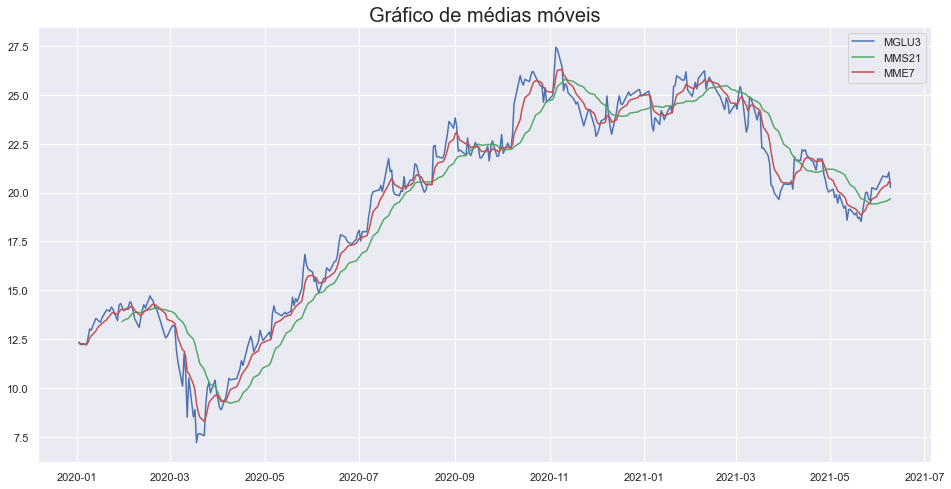

In [2]:
'''
Buscando dados da ação para a geração de relatório. 
OBS: Para este exemplo, escolheremos a empresa Magazine Luiza '''

a = input('Digite o ticker da ação: ')
start = '2020-01-01'

acao = pdr.DataReader(a+'.SA', data_source = 'yahoo', start = start)

### Gráfico de Médias Móveis ###

seaborn.set()
plt.figure(figsize = (16,8))
plt.title('Gráfico de médias móveis', fontsize = 20)
plt.plot(acao['Close'], label = a)
plt.plot(acao['Close'].rolling(21).mean(), label = 'MMS21', c = 'g')
plt.plot(acao['Close'].ewm(span = 7).mean(), label = 'MME7', c = 'r')
plt.legend()
plt.savefig('Gráfico Médias Móveis', dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)

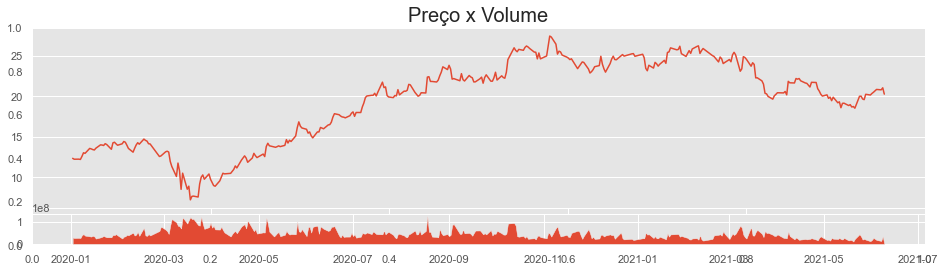

In [3]:
### Gráfico Preço x Volume ###

plt.style.use('ggplot')
figura = plt.figure(figsize = (16, 4))
plt.title('Preço x Volume', fontsize = 20)
g = figura.add_gridspec(nrows = 6, ncols = 1)
eixo1 = figura.add_subplot(g[0:5,0])
eixo2 = figura.add_subplot(g[5,0])

eixo1.plot(acao['Close'])
eixo2.fill_between(acao.index, acao['Volume'], 0)

eixo1.axes.get_xaxis().set_visible(False)
eixo2.xaxis_date()

plt.savefig('Gráfico Preço x Volume', dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)

#### Na parte final do projeto, utilizaremos a biblioteca <a href ="https://pyfpdf.readthedocs.io/en/latest/Tutorial/index.html" >FPDF</a> para gerar um relatório automático com os indicadores e gráficos da empresa escolhida anteriormente em um arquivo .pdf

In [4]:
emp = yf.Ticker(a+'.SA')
# emp.info
emp_infos = ['longName',
         'market',
         'industry',
         'symbol', 
         'shortName',
         'marketCap', 
         'priceToBook',
         'averageDailyVolume10Day',
         'payoutRatio', 
         'longBusinessSummary' ]

infos = {key: emp.info[key] for key in emp_infos}
# infos

In [7]:
altura = 297
largura = 210
margem = 10 

### Formatação ###
pdf = FPDF('P', 'mm', 'A4')  # --> Medidas da pág 
pdf.add_page()
pdf.set_font('Times', 'B', 12)
pdf.set_auto_page_break(auto = bool, margin = margem )

### Título ###

companhia = infos['shortName']
pdf.cell(largura - 2 * margem, 30, f'Análise {companhia}', border = 1, ln = 1, align = 'C')
pdf.cell(5, 5, '', 1, 1)

''' Texto do documento (detalhes/ indicadores) '''

### Definir uma função para adicionar linhas ao documento c/ a formatação desejada ###

def adc_linha(bold_1, text_1, bold_2, text_2):

  pdf.set_font('times','B',12)
  pdf.cell(30, 10, bold_1, 0, 0)

  pdf.set_font('times','',12)
  pdf.cell(65, 10, text_1, 0, 0, align = 'C')

  pdf.set_font('times','B', 12)
  pdf.cell(30, 10 ,bold_2, 0, 0)

  pdf.set_font('times','',12)
  pdf.cell(65, 10 ,text_2, 0, 1, align = 'C')
    
pdf.set_font('Times', 'BU', 12)
pdf.cell(60, 10, 'Detalhes da Empresa', 1, 1)

# 1a Linha
adc_linha('Empresa: ', infos['longName'],
          'Ticker: ', infos['symbol'])
# 2a Linha 
adc_linha('Mercado: ', infos['market'], 
          'Indústria: ', infos['industry'])


pdf.set_font('Times', 'BU', 12)
pdf.cell(30, 10, 'Detalhes da Empresa', 0, 1)

# 3a Linha
n = infos['marketCap']
cap_mercado = format(n, ',').replace(',' , '.') + ' R$'
adc_linha('Cap. Mercado: ', cap_mercado, 
          'P/B Ratio: ', str(round(infos['priceToBook'], 2)))

# 4a Linha
n2 = infos['averageDailyVolume10Day']
vmd = format(n2, ',').replace(',' , '.')
adc_linha('Volume Diário ', vmd, 
          'Índice de destrib. de div: ', str(round(infos['payoutRatio'], 2)))
pdf.cell(30, 5, '', 0, 1)

'''Inserindo gráficos '''

### Gráfico de Médias Móveis ###

pdf.set_font('Times', 'BU', 12)
pdf.cell(60, 10, 'Análise Gráfica', 0, 1)
img = 'Gráfico Médias Móveis.png'
pdf.image(img, x = pdf.get_x(), w = largura - 2 * margem, h = (altura - pdf.get_y() - 10 * margem))

### Gráfico de Preço x Volume ###

pdf.set_font('Times', 'BU', 12)
pdf.cell(60, 10, '', 0, 1)
img = 'Gráfico Preço x Volume.png'
pdf.image(img, x = pdf.get_x(), w = largura - 2 * margem, h = (altura - pdf.get_y() - 2 * margem))

# Nota de rodapé 

pdf.set_font('Times', 'BU', 10)
hoje = datetime.now().strftime('%d-%m-%y')
nota_rodape = f'Análise {companhia}. Relatório gerado em {hoje}.'

pdf.text(x = largura - len(nota_rodape) * 1.5 - margem,
        y = altura - margem / 2,
        txt = nota_rodape)

pdf.output('Relatório.pdf', 'F')

''

### Imagens do pdf criado:

<img src = 'relatorio_1w.png' style = 'width:600px; height:600px'/>
<img src = 'relatorio_2w.png' style = 'width:600px; height:600px'/>

#### Quando os códigos forem executados novamente, o arquivo relatorio.pdf será substituído no folder do jupyter pelo mais recente, com os indicadores e gráficos atualizados da empresa que for escolhida no terminal da célula onde definimos o input para o ticker da empresa a ser definido